In [ ]:


from google.colab import drive
drive.mount('drive/')
!pip install transformers


from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot


Drive already mounted at drive/; to attempt to forcibly remount, call drive.mount("drive/", force_remount=True).


In [ ]:
import pandas as pd
import csv
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
df = pd.read_csv("drive/My Drive/train-balanced-sarcasm_edit3.csv", names=['label','comment','author','subreddit','score','ups','downs','date','created_utc','parent_comment'],quoting=csv.QUOTE_NONE)
# df["comment"] = df["comment"].astype(str)





/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.dropna(subset=['comment'], inplace=True)
# df.apply(preprocessing.LabelEncoder().fit_transform(df['comment']))

comment_train = df['comment']
comment_train = comment_train.iloc[1:]
label_train = df['label']
label_train = label_train.iloc[1:]

label_train = label_train.astype(int)



X_train, X_test, y_train, y_test = train_test_split(
    comment_train, label_train, random_state=10
)

from sklearn.feature_extraction import text

stats = TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS, ngram_range=(1,2), max_features=100000, min_df=10)





model = RandomForestClassifier(n_estimators=10)

pipe = Pipeline([('stats', stats), ('rf', model)])






In [ ]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('stats',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0,
                                 max_features=100000, min_df=10,
                                 ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterw...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto'

['00', '000', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '10 10', '10 11', '10 12', '10 15', '10 20', '10 bang', '10 bucks', '10 days', '10 dollars', '10 feet', '10 games', '10 hours', '10 like', '10 million', '10 mins', '10 minute', '10 minutes', '10 needs', '10 people', '10 rice', '10 second', '10 seconds', '10 times', '10 year', '10 years', '100', '100 accurate', '100 agree', '100 bucks', '100 chance', '100 correct', '100 dollars', '100 games', '100 million', '100 people', '100 percent', '100 pure', '100 real', '100 sure', '100 time', '100 times', '100 true', '100 yards', '100 year', '100 years', '1000', '1000 times', '1000 years', '10000', '100k', '100m', '100s', '100th', '100x', '101', '102', '103', '105', '1060', '1070', '108', '1080', '1080p', '1080p 60fps', '109', '10k', '10m', '10s', '10th', '10x', '11', '11 10', '11 11', '11 12', '11 happened', '11 inside', '11 million', '11 year', '11 years', '110', '1100', '111', '112', '115', '11th', '12', '12 hours', '12 

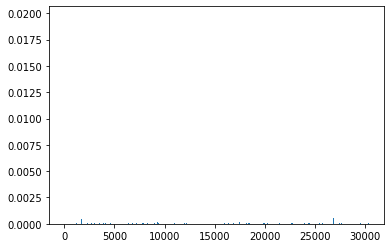

In [ ]:




names = stats.get_feature_names()

print(names)
# print(names[499])

# stats = TfidfVectorizer(ngram_range=(1,2), max_features=50000, min_df=10)

# X = df.comment.values
# y = df.label.values
# define dataset


# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()


# X = le.fit_transform(X)

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform([X])

# X_train, X_test, y_train, y_test = train_test_split(
#     X_scaled, y, stratify=y, test_size=0.10, random_state=42
# )

# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()

# X = le.fit_transform(X)


# X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
# model = RandomForestClassifier()
# # fit the model
# model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance

score = dict()
for i,v in enumerate(importance):
    # print('Feature: %0d, Score: %.5f' % (i,v))
    score[names[i]] = v


# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
print(score)

sort = sorted(score.items(), key=lambda kv: kv[1], reverse=True)

print(sort)

with open('test3.csv', 'w') as f:
    for key in score.keys():
        f.write("%s,%s\n"%(key,score[key]))

{'00': 5.2791288170253925e-05, '000': 1.2663242990837577e-05, '01': 1.9694608448196382e-05, '02': 8.934537631538221e-06, '03': 1.1172970187426093e-05, '04': 1.2434822852816409e-05, '05': 1.5907031773347844e-05, '06': 1.2278937489068136e-05, '07': 8.485457591056361e-06, '08': 1.860105148262456e-05, '09': 9.879321728928272e-06, '10': 0.0007129552698472139, '10 10': 6.826415349252102e-05, '10 11': 3.2896148482032116e-06, '10 12': 5.274401578359364e-06, '10 15': 6.380402870123845e-06, '10 20': 2.370036681834851e-06, '10 bang': 5.516547876812369e-06, '10 bucks': 3.440883118963933e-06, '10 days': 5.614003951040356e-06, '10 dollars': 9.395750221302242e-07, '10 feet': 1.1881783603858724e-06, '10 games': 3.506717578553768e-06, '10 hours': 5.8100826152316125e-06, '10 like': 3.606716304742478e-06, '10 million': 4.762648394303084e-06, '10 mins': 4.1652728340418e-06, '10 minute': 7.496020274489852e-06, '10 minutes': 1.5026582173251155e-05, '10 needs': 2.6670254334459233e-06, '10 people': 9.34301342